#### Problem Statement:
Our final goal is to build a model, which can predict whether the income of a random adult American citizen is less or greater than 50000$ a year

In [2]:
#Importing the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objs as go
from plotly.offline import iplot

In [3]:
# Installing dexplot
! pip install dexplot

### Reading the Data from the CSV file

In [5]:
df = pd.read_csv("adult.csv")
df.head()

39          State-gov   77516   Bachelors  ...   0  40   United-States   <=50K
0  50   Self-emp-not-inc   83311   Bachelors  ...   0  13   United-States   <=50K
1  38            Private  215646     HS-grad  ...   0  40   United-States   <=50K
2  53            Private  234721        11th  ...   0  40   United-States   <=50K
3  28            Private  338409   Bachelors  ...   0  40            Cuba   <=50K
4  37            Private  284582     Masters  ...   0  40   United-States   <=50K

[5 rows x 15 columns]

In [6]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [7]:
df.drop([' 2174', ' 0', ' 40'], axis = 'columns', inplace = True)
df.head()

39          State-gov   77516  ...     Male   United-States   <=50K
0  50   Self-emp-not-inc   83311  ...     Male   United-States   <=50K
1  38            Private  215646  ...     Male   United-States   <=50K
2  53            Private  234721  ...     Male   United-States   <=50K
3  28            Private  338409  ...   Female            Cuba   <=50K
4  37            Private  284582  ...   Female   United-States   <=50K

[5 rows x 12 columns]

In [8]:
# Since with the given name we are unable to judge what the data is indicating 
# Lets rename the columns name to understand the dataset more easily

df.columns = ['Age', 'Type_of_Owner', 'id', 'Education', 'No_of_Projects_Done', 'Marital_Status', 'Job_Designation', 'Family_Relation', 'Race', 'Gender', 'Country', 'Salary']

In [9]:
# Lets go through the data once more 
df.head()

Age      Type_of_Owner      id  ...   Gender         Country  Salary
0   50   Self-emp-not-inc   83311  ...     Male   United-States   <=50K
1   38            Private  215646  ...     Male   United-States   <=50K
2   53            Private  234721  ...     Male   United-States   <=50K
3   28            Private  338409  ...   Female            Cuba   <=50K
4   37            Private  284582  ...   Female   United-States   <=50K

[5 rows x 12 columns]

The data now seems to be more readable

In [10]:
# Finding the shape of the data
df.shape

(32560, 12)

There is 32560 rows and 12 columns in the dataset


In [11]:
# Getting info about the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  32560 non-null  int64 
 1   Type_of_Owner        32560 non-null  object
 2   id                   32560 non-null  int64 
 3   Education            32560 non-null  object
 4   No_of_Projects_Done  32560 non-null  int64 
 5   Marital_Status       32560 non-null  object
 6   Job_Designation      32560 non-null  object
 7   Family_Relation      32560 non-null  object
 8   Race                 32560 non-null  object
 9   Gender               32560 non-null  object
 10  Country              32560 non-null  object
 11  Salary               32560 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [12]:
# Describing the Data
df.describe()

Age            id  No_of_Projects_Done
count  32560.000000  3.256000e+04         32560.000000
mean      38.581634  1.897818e+05            10.080590
std       13.640642  1.055498e+05             2.572709
min       17.000000  1.228500e+04             1.000000
25%       28.000000  1.178315e+05             9.000000
50%       37.000000  1.783630e+05            10.000000
75%       48.000000  2.370545e+05            12.000000
max       90.000000  1.484705e+06            16.000000

In [13]:
# Checking whether there is any missing values or not
df.isnull().sum()

Age                    0
Type_of_Owner          0
id                     0
Education              0
No_of_Projects_Done    0
Marital_Status         0
Job_Designation        0
Family_Relation        0
Race                   0
Gender                 0
Country                0
Salary                 0
dtype: int64

Wow there is no missing values in the dataset

# Data Visualization

In [14]:
# Visualizing the Type of Sponsor Dataset

labels = df['Type_of_Owner'].value_counts().index
values = df['Type_of_Owner'].value_counts().values

colors = df['Type_of_Owner']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

From the above datasets we can see that most of the Jobs lies in the private sector and its around 70% infact

In [15]:
# Visualizing the Type of Age Dataset

labels = df['Age'].value_counts()[:10].index
values = df['Age'].value_counts()[:10].values

colors = df['Age']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

FRom the above dataset we can see that most of the job-seeker falls in the age-group of 30-40 

In [16]:
# Visualizing the Highest Degree of Eduaction

labels = df['Education'].value_counts().index
values = df['Education'].value_counts().values

colors = df['Education']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

Most of the Working Class people have HS-grad degree followed by Some-College degree and Bachelors

In [17]:
# Visualizing the No_of_Projects_Done

labels = df['No_of_Projects_Done'].value_counts().index
values = df['No_of_Projects_Done'].value_counts().values

colors = df['No_of_Projects_Done']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

Most of the People have 9 or 10 projects in their account

In [18]:
# Visualizing the Marital Status of the Working Class People

labels = df['Marital_Status'].value_counts().index
values = df['Marital_Status'].value_counts().values

colors = df['Marital_Status']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

From the output we can see that 46% people are married and 32.8% people never get married

In [19]:
# Visualizing the Job Descriptions of the Working Class People

labels = df['Job_Designation'].value_counts().index
values = df['Job_Designation'].value_counts().values

colors = df['Job_Designation']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

About 50% of the people are involved in Prof-speciality, Craft-repair, Exec-managerial and Adm-clerical

In [20]:
# Visualizing the Family-Relation of the Working Class People

labels = df['Family_Relation'].value_counts().index
values = df['Family_Relation'].value_counts().values

colors = df['Family_Relation']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

Most of the working class person are Husband of someone


In [21]:
# Try to see the different type of race of the Working Class
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

There are 4 different race of the Working Class of the people

In [22]:
# Visualizing the Race of the Working Class People

labels = df['Race'].value_counts().index
values = df['Race'].value_counts().values

colors = ['#98adbf',
 '#1d4466',
 '#2678bf',
 '#2c6699']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

From the above plot it is quite visble that White People have supermacy over the Black while getting job and Black people still face the Color Discriminations

In [23]:
# Visualizing the Gender of the Working Class People

labels = df['Gender'].value_counts().index
values = df['Gender'].value_counts().values

colors = ['#98adbf',
 '#2c6699']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

From the above it is visible that in the job sector still female are lagging to get the job

In [24]:
# Visualizing the Country of the Working Class People

labels = df['Country'].value_counts().index
values = df['Country'].value_counts().values

colors = df['Country']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

About 90% of the Working Class people are Residents of the US

In [25]:
# Visualizing the Salary of the Working Class People

labels = df['Salary'].value_counts().index
values = df['Salary'].value_counts().values

colors = ['#98adbf',
 '#2c6699']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

Only round 24% of the people get the salary above 24% and around 76% of the people get 50k or less than 50k as salary

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


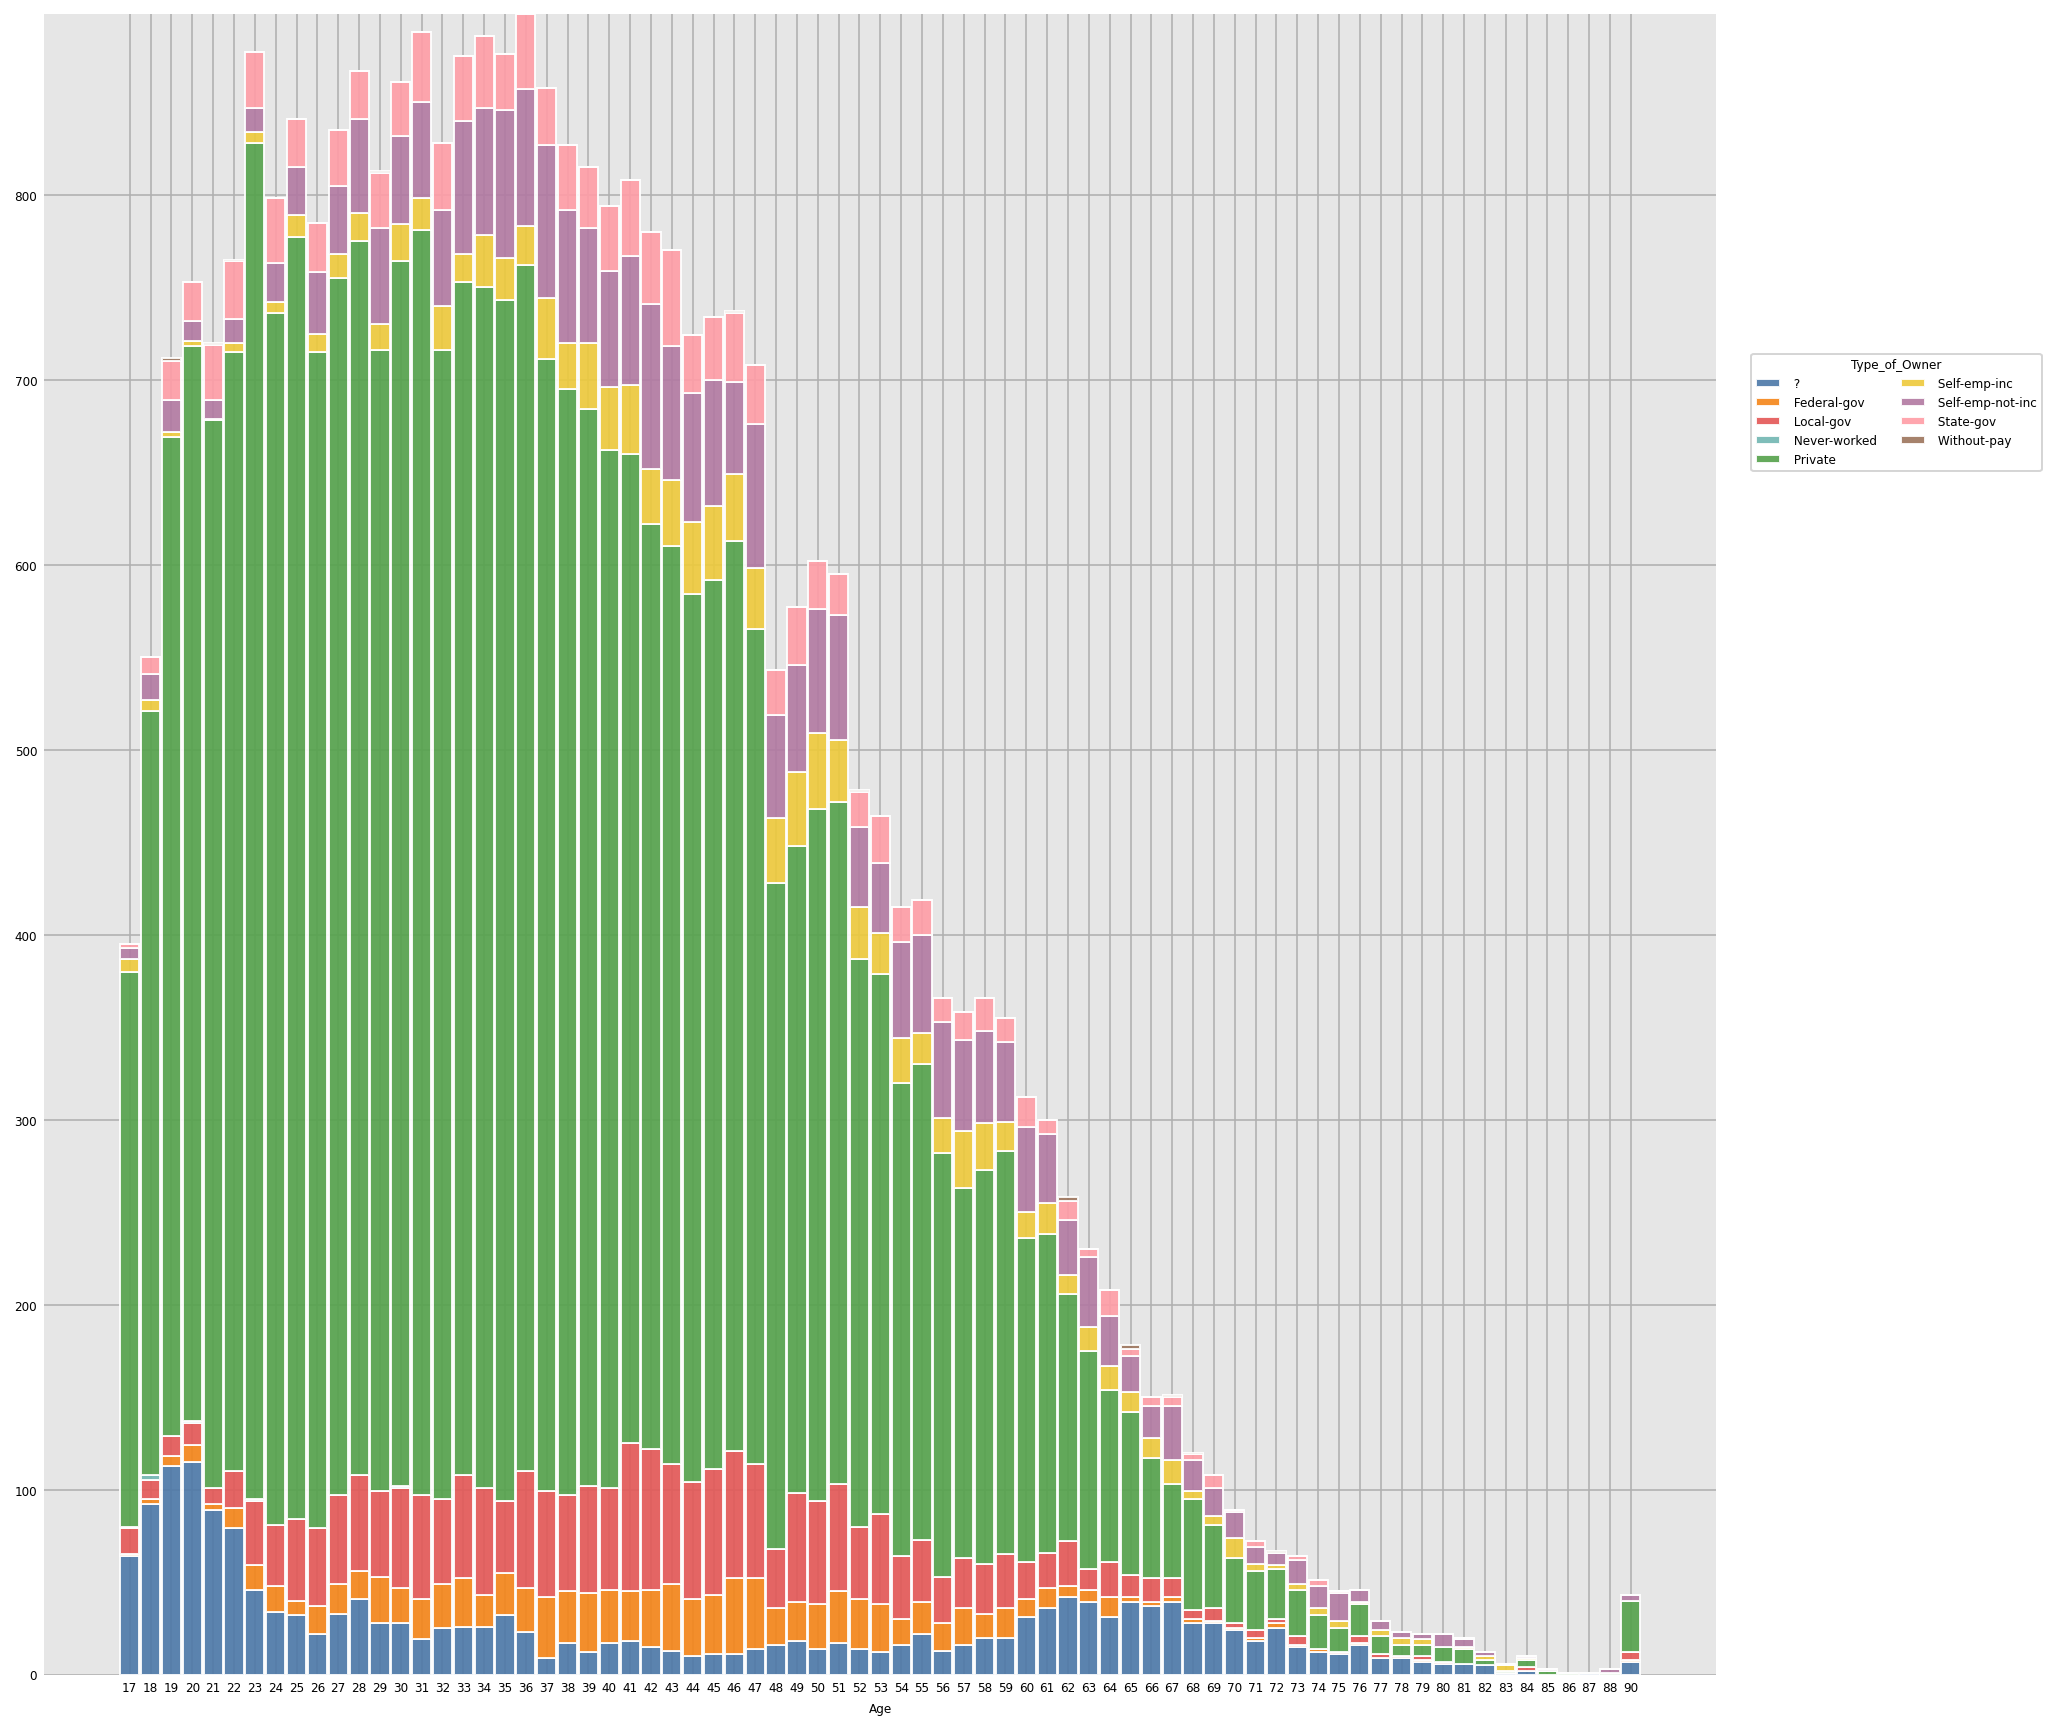

In [26]:
# Importing the Dexplot

import dexplot as dxp

dxp.count(
    val="Age",
    data = df,
    split="Type_of_Owner",
    stacked = True,
    figsize=(12,12),
    xlabel = "Age of the Working Class People")

From the above graph we can see that how the Job Type of the People of Different Age varies, Though most people are involved in Private Job Type in all the age group but Private Job is predominantly occupied by the people in the age group of 17-60 years old people

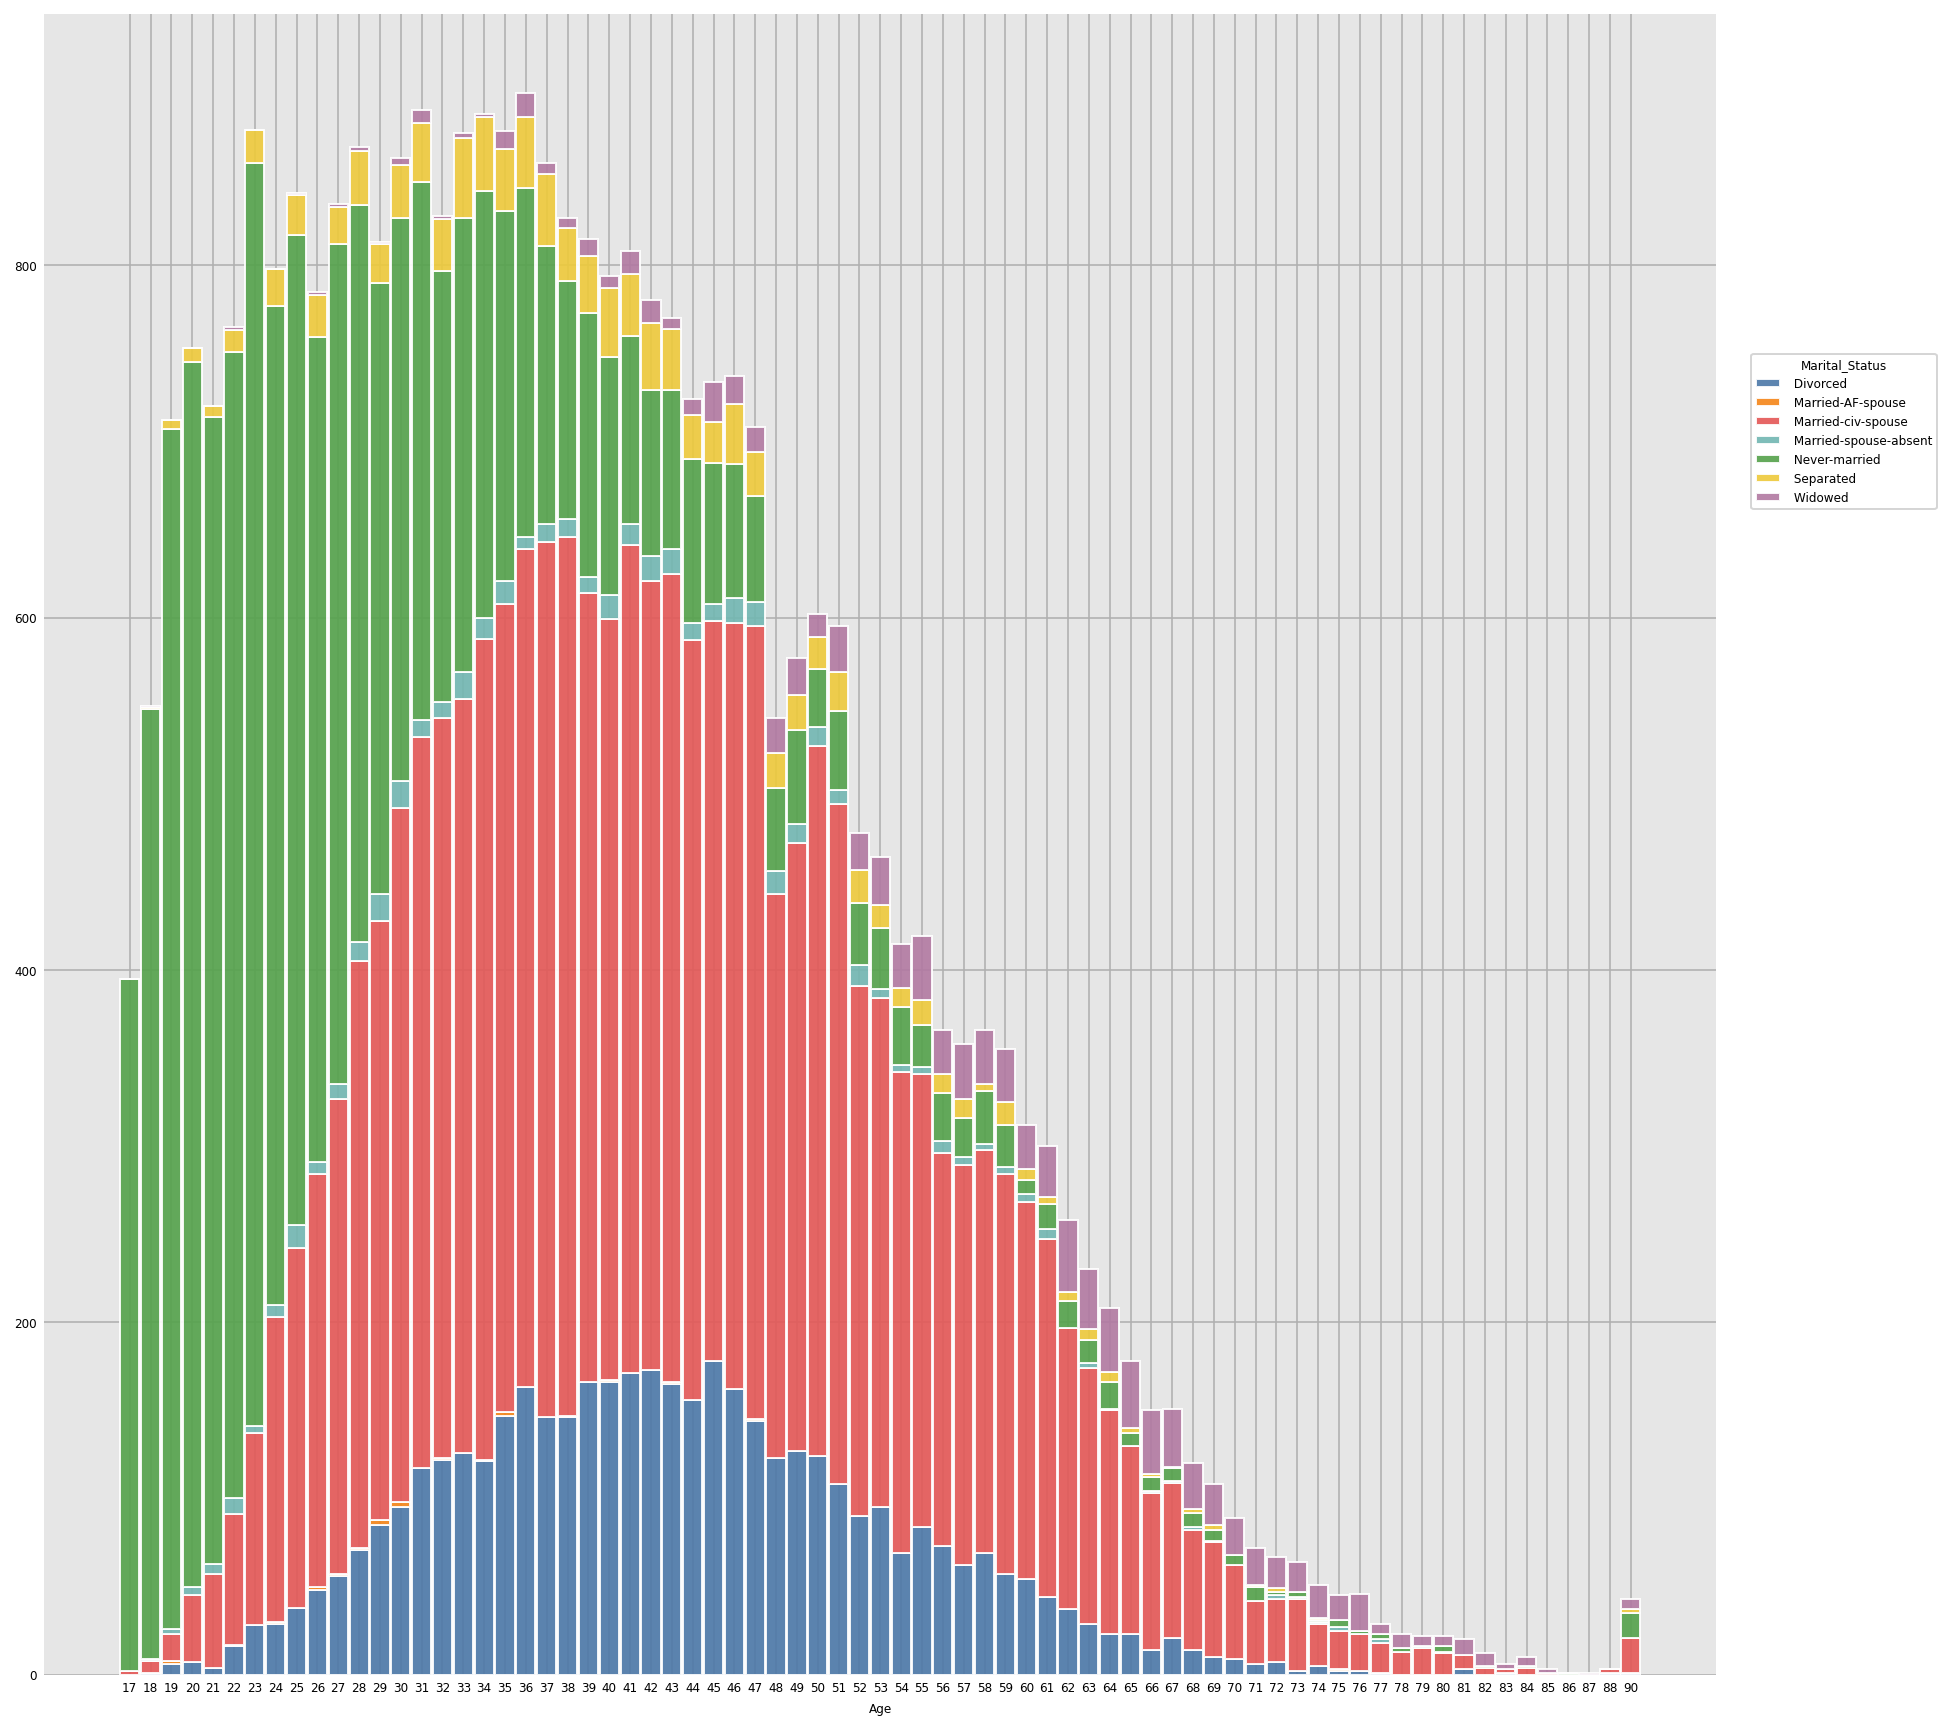

In [27]:
dxp.count(
    val="Age",
    data = df,
    split="Marital_Status",
    stacked = True,
    figsize=(12,12),
    xlabel = "Age of the Working Class People")

From the above data it is clear that people falling in the age-group of 17-30 are unmarried and people falling in the age-group of 30-65 years are predominantly married also a large portion of people in the age-group 30-55 years are divorced.

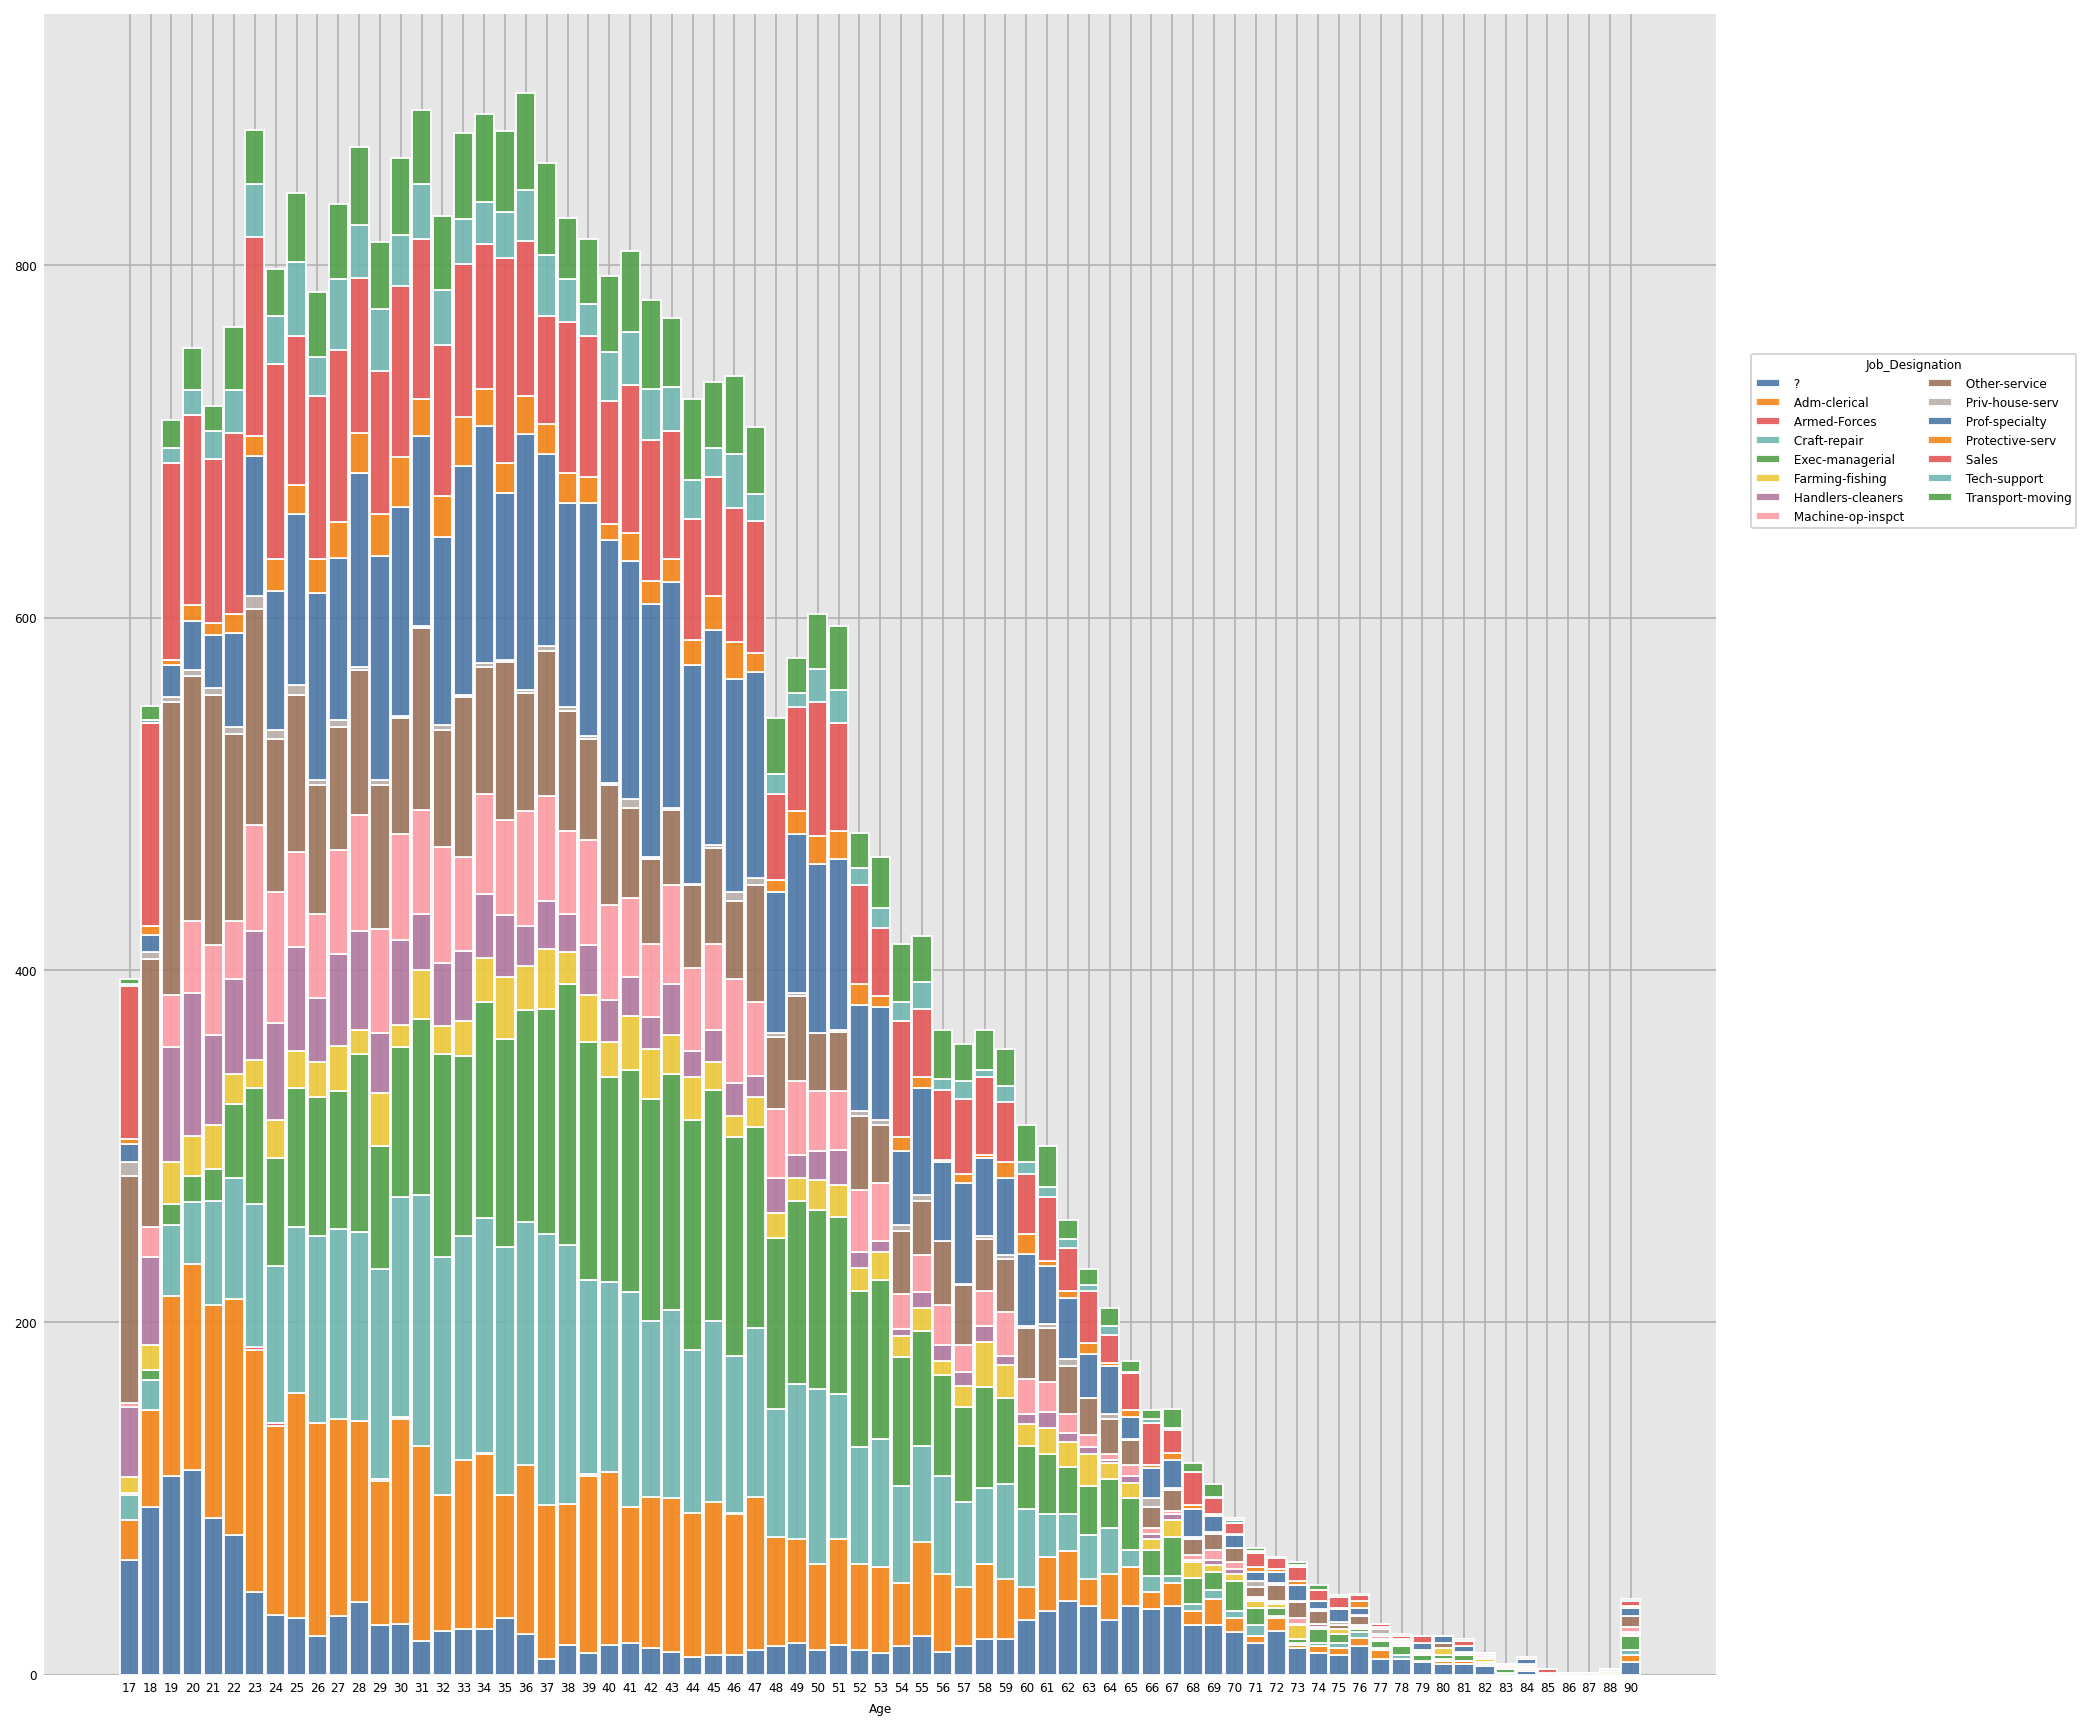

In [28]:
dxp.count(
    val="Age",
    data = df,
    split="Job_Designation",
    stacked = True,
    figsize=(12,12),
    xlabel = "Age of the Working Class People")

From the above graph we can see that how the Age and Job-Profile of people varies

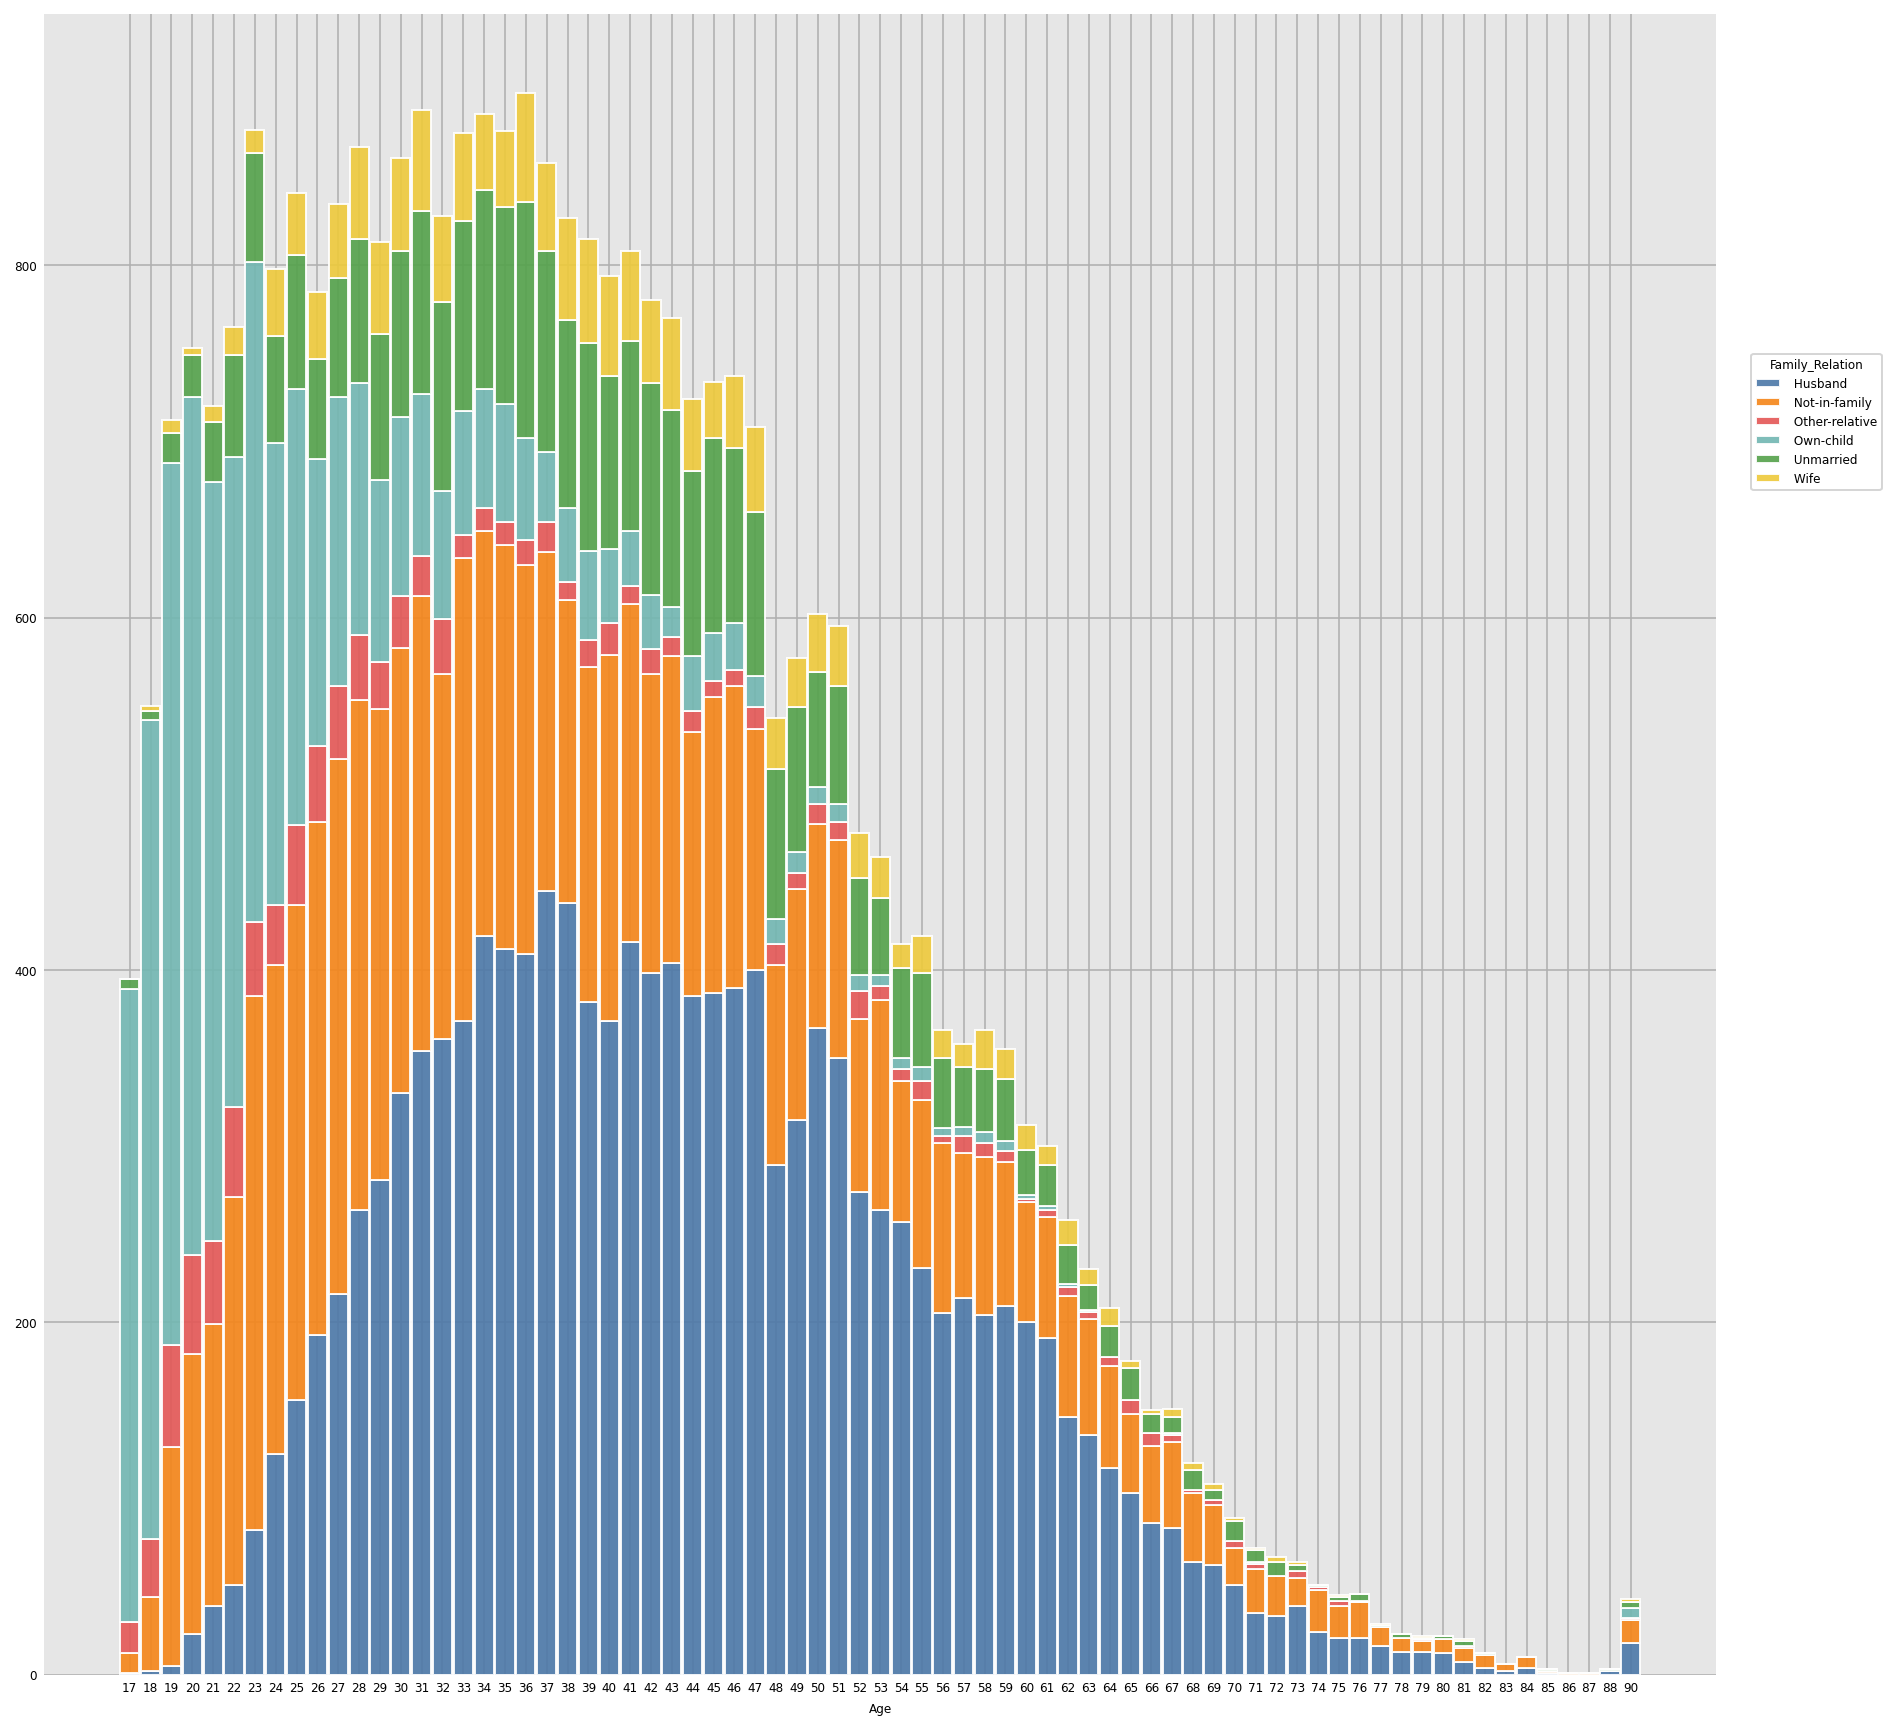

In [29]:
dxp.count(
    val="Age",
    data = df,
    split="Family_Relation",
    stacked = True,
    figsize=(12,12),
    xlabel = "Age of the Working Class People")

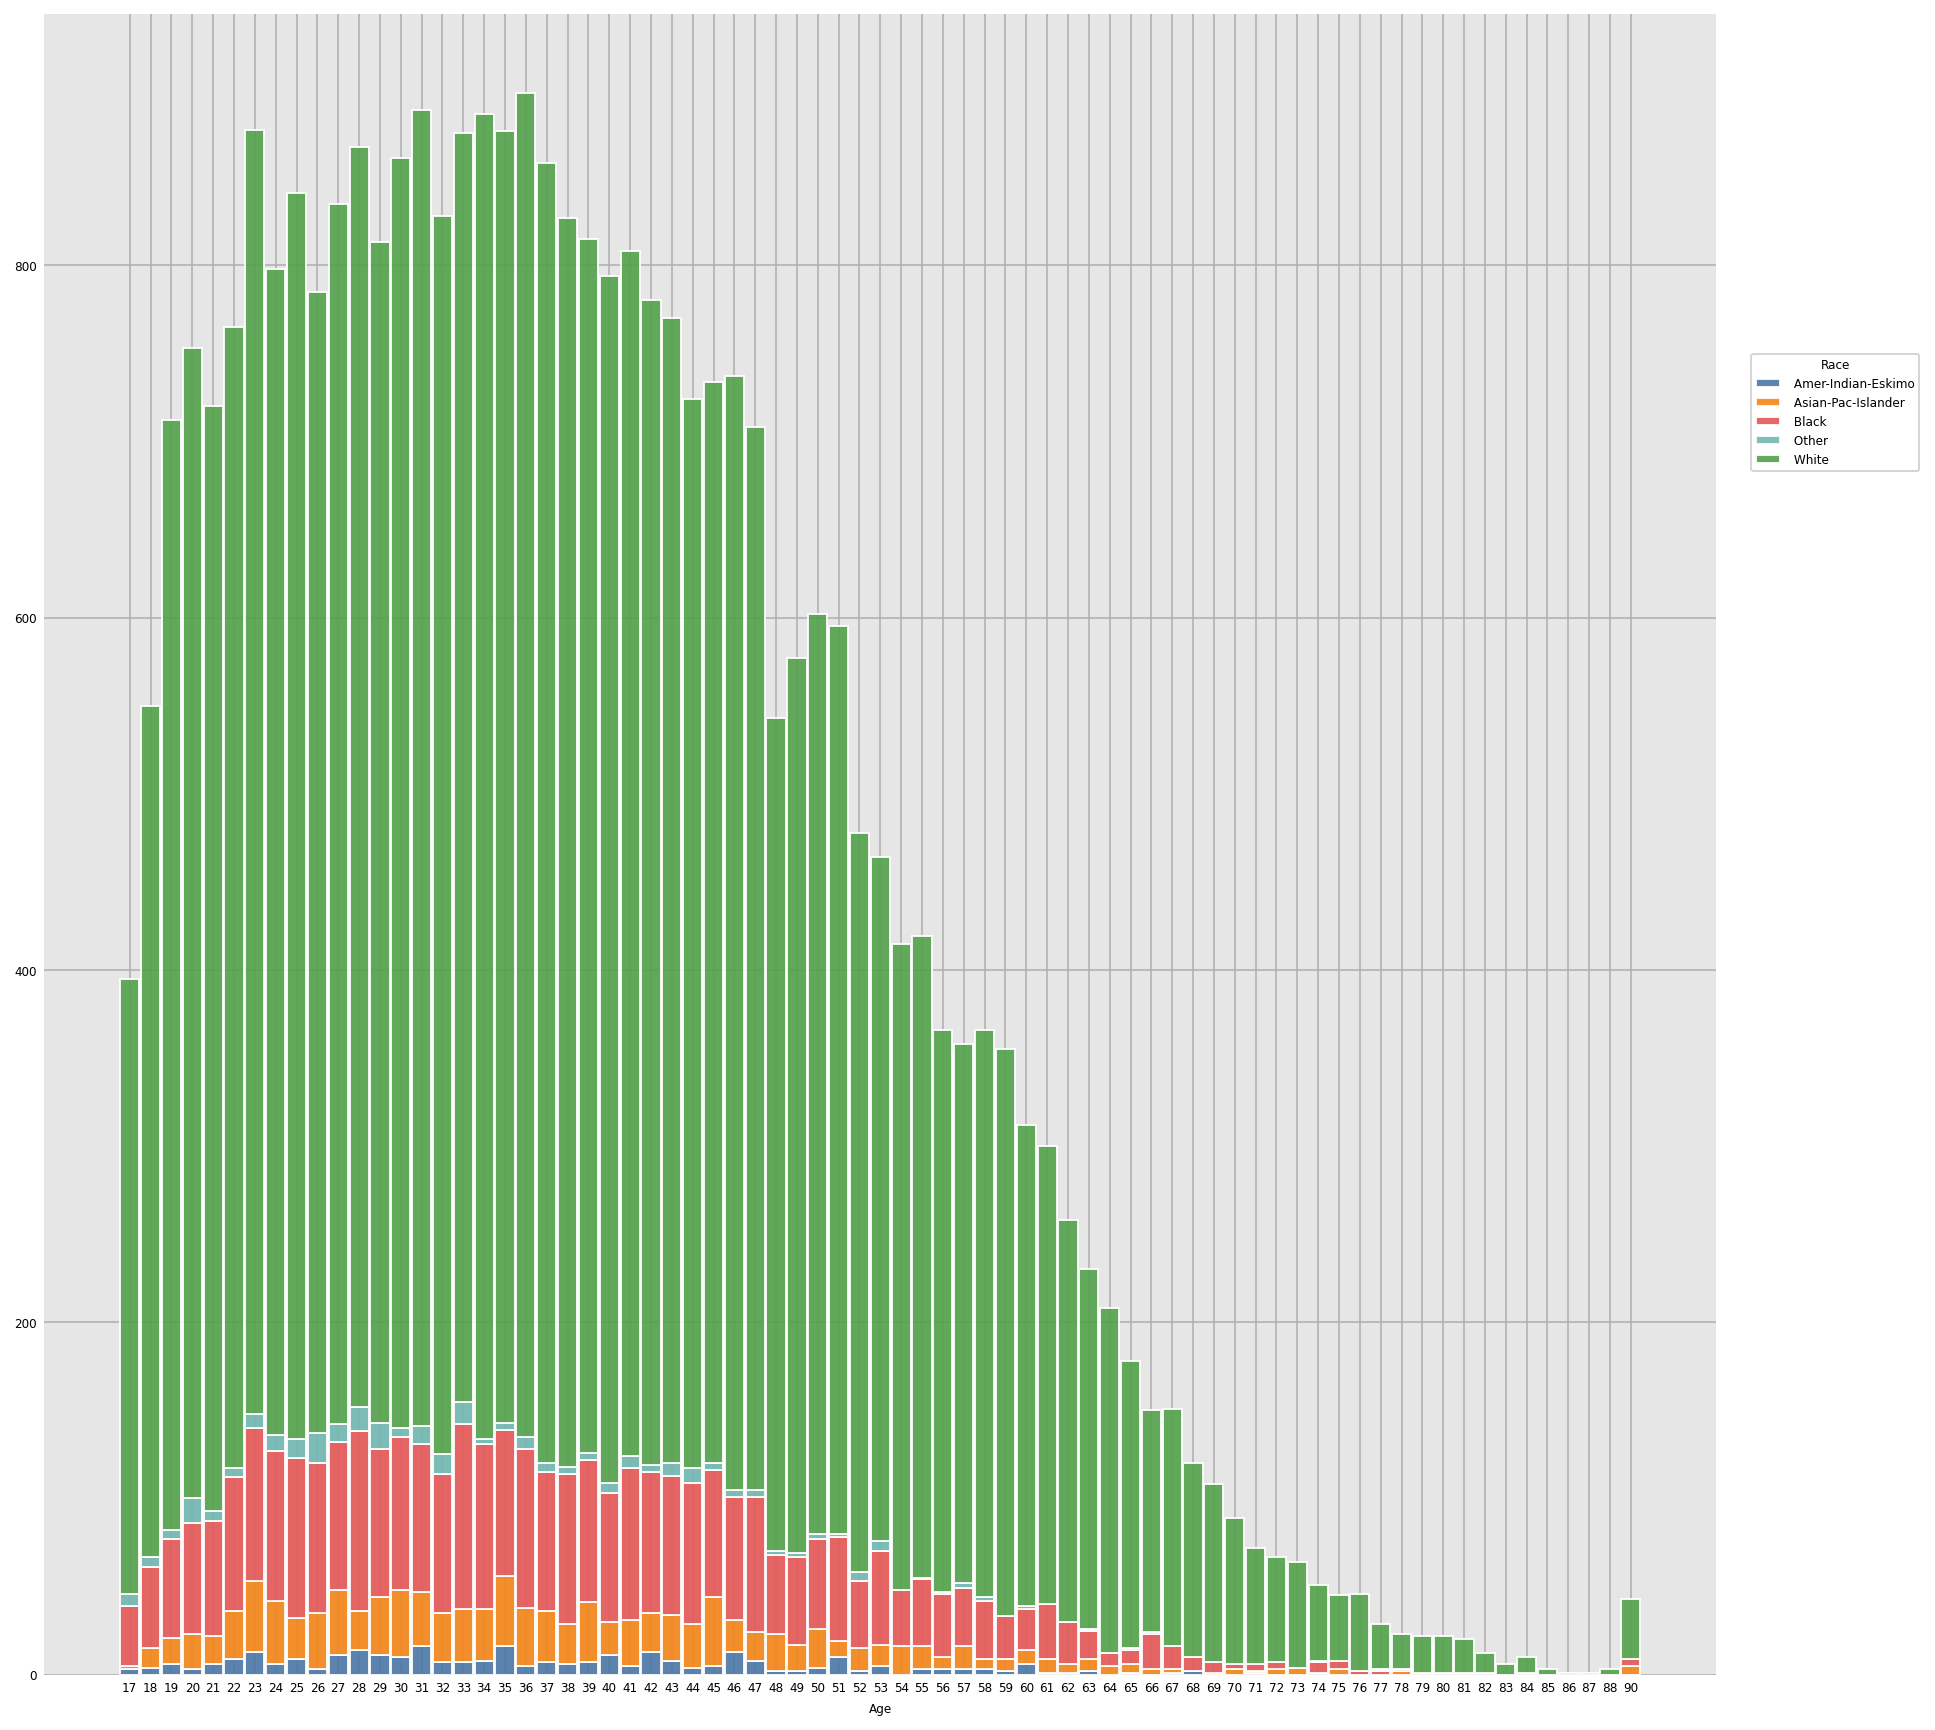

In [30]:
dxp.count(
    val="Age",
    data = df,
    split="Race",
    stacked = True,
    figsize=(12,12),
    xlabel = "Age of the Working Class People")

From the above graph its clear most people in any age group are predominantly white

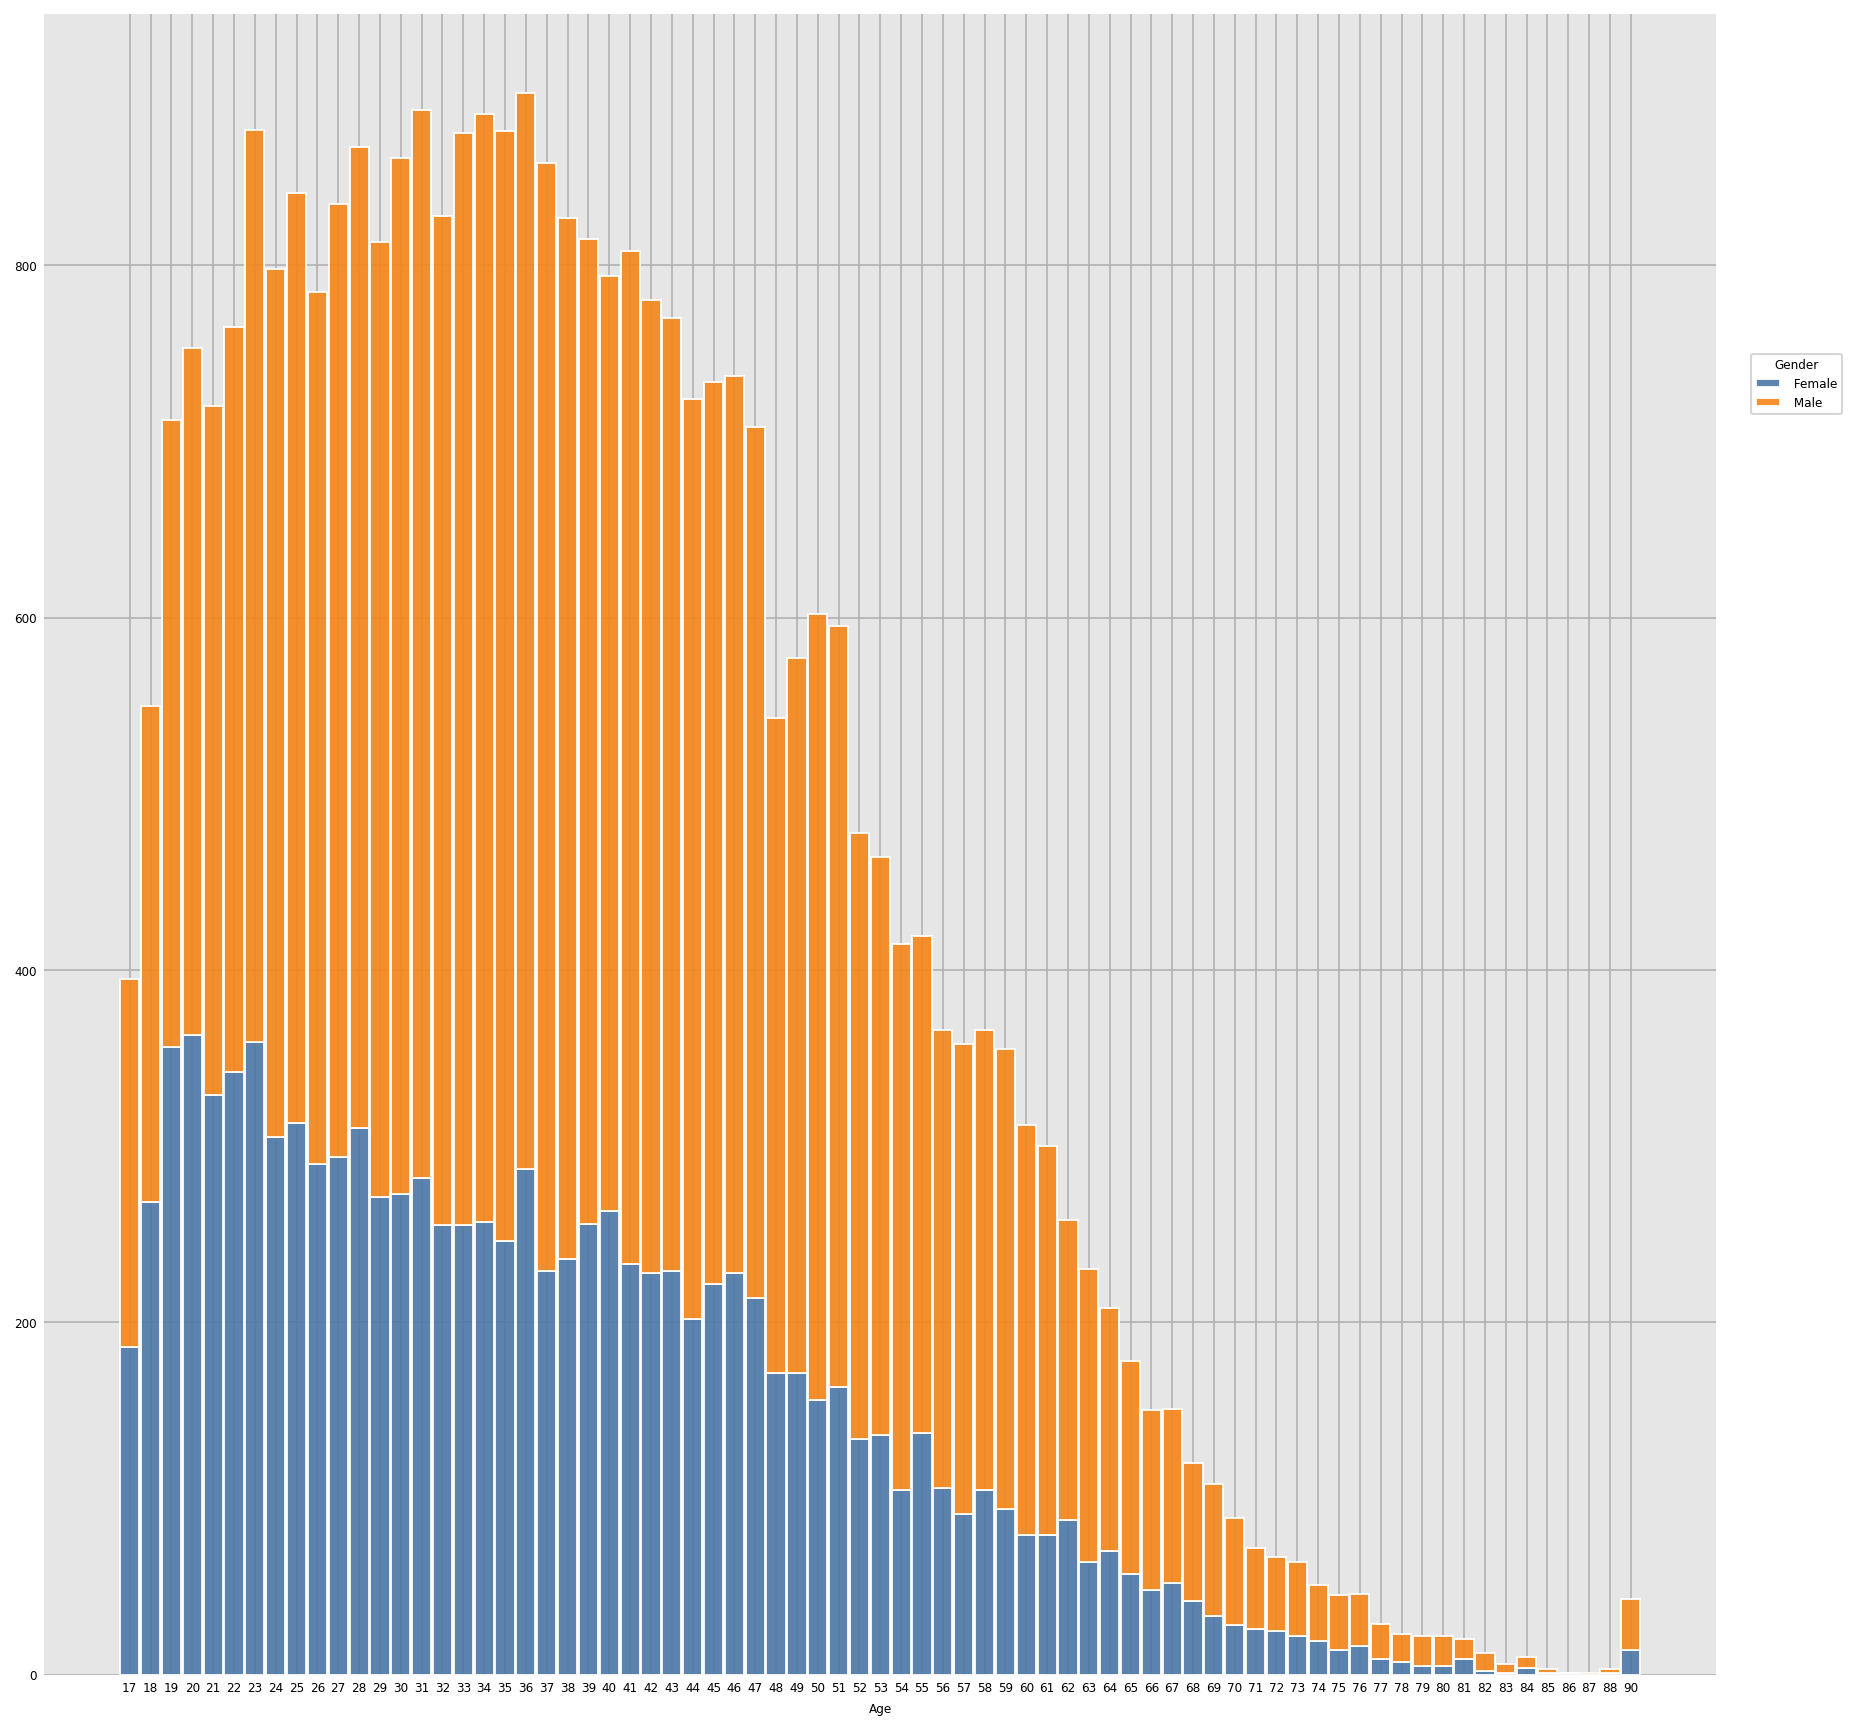

In [31]:
dxp.count(
    val="Age",
    data = df,
    split="Gender",
    stacked = True,
    figsize=(12,12),
    xlabel = "Age of the Working Class People")

Its clear from the above graph that most working female fall in the age-group of 17-55 and infact they have started working at early age while most male in the age-group of 23 onwards

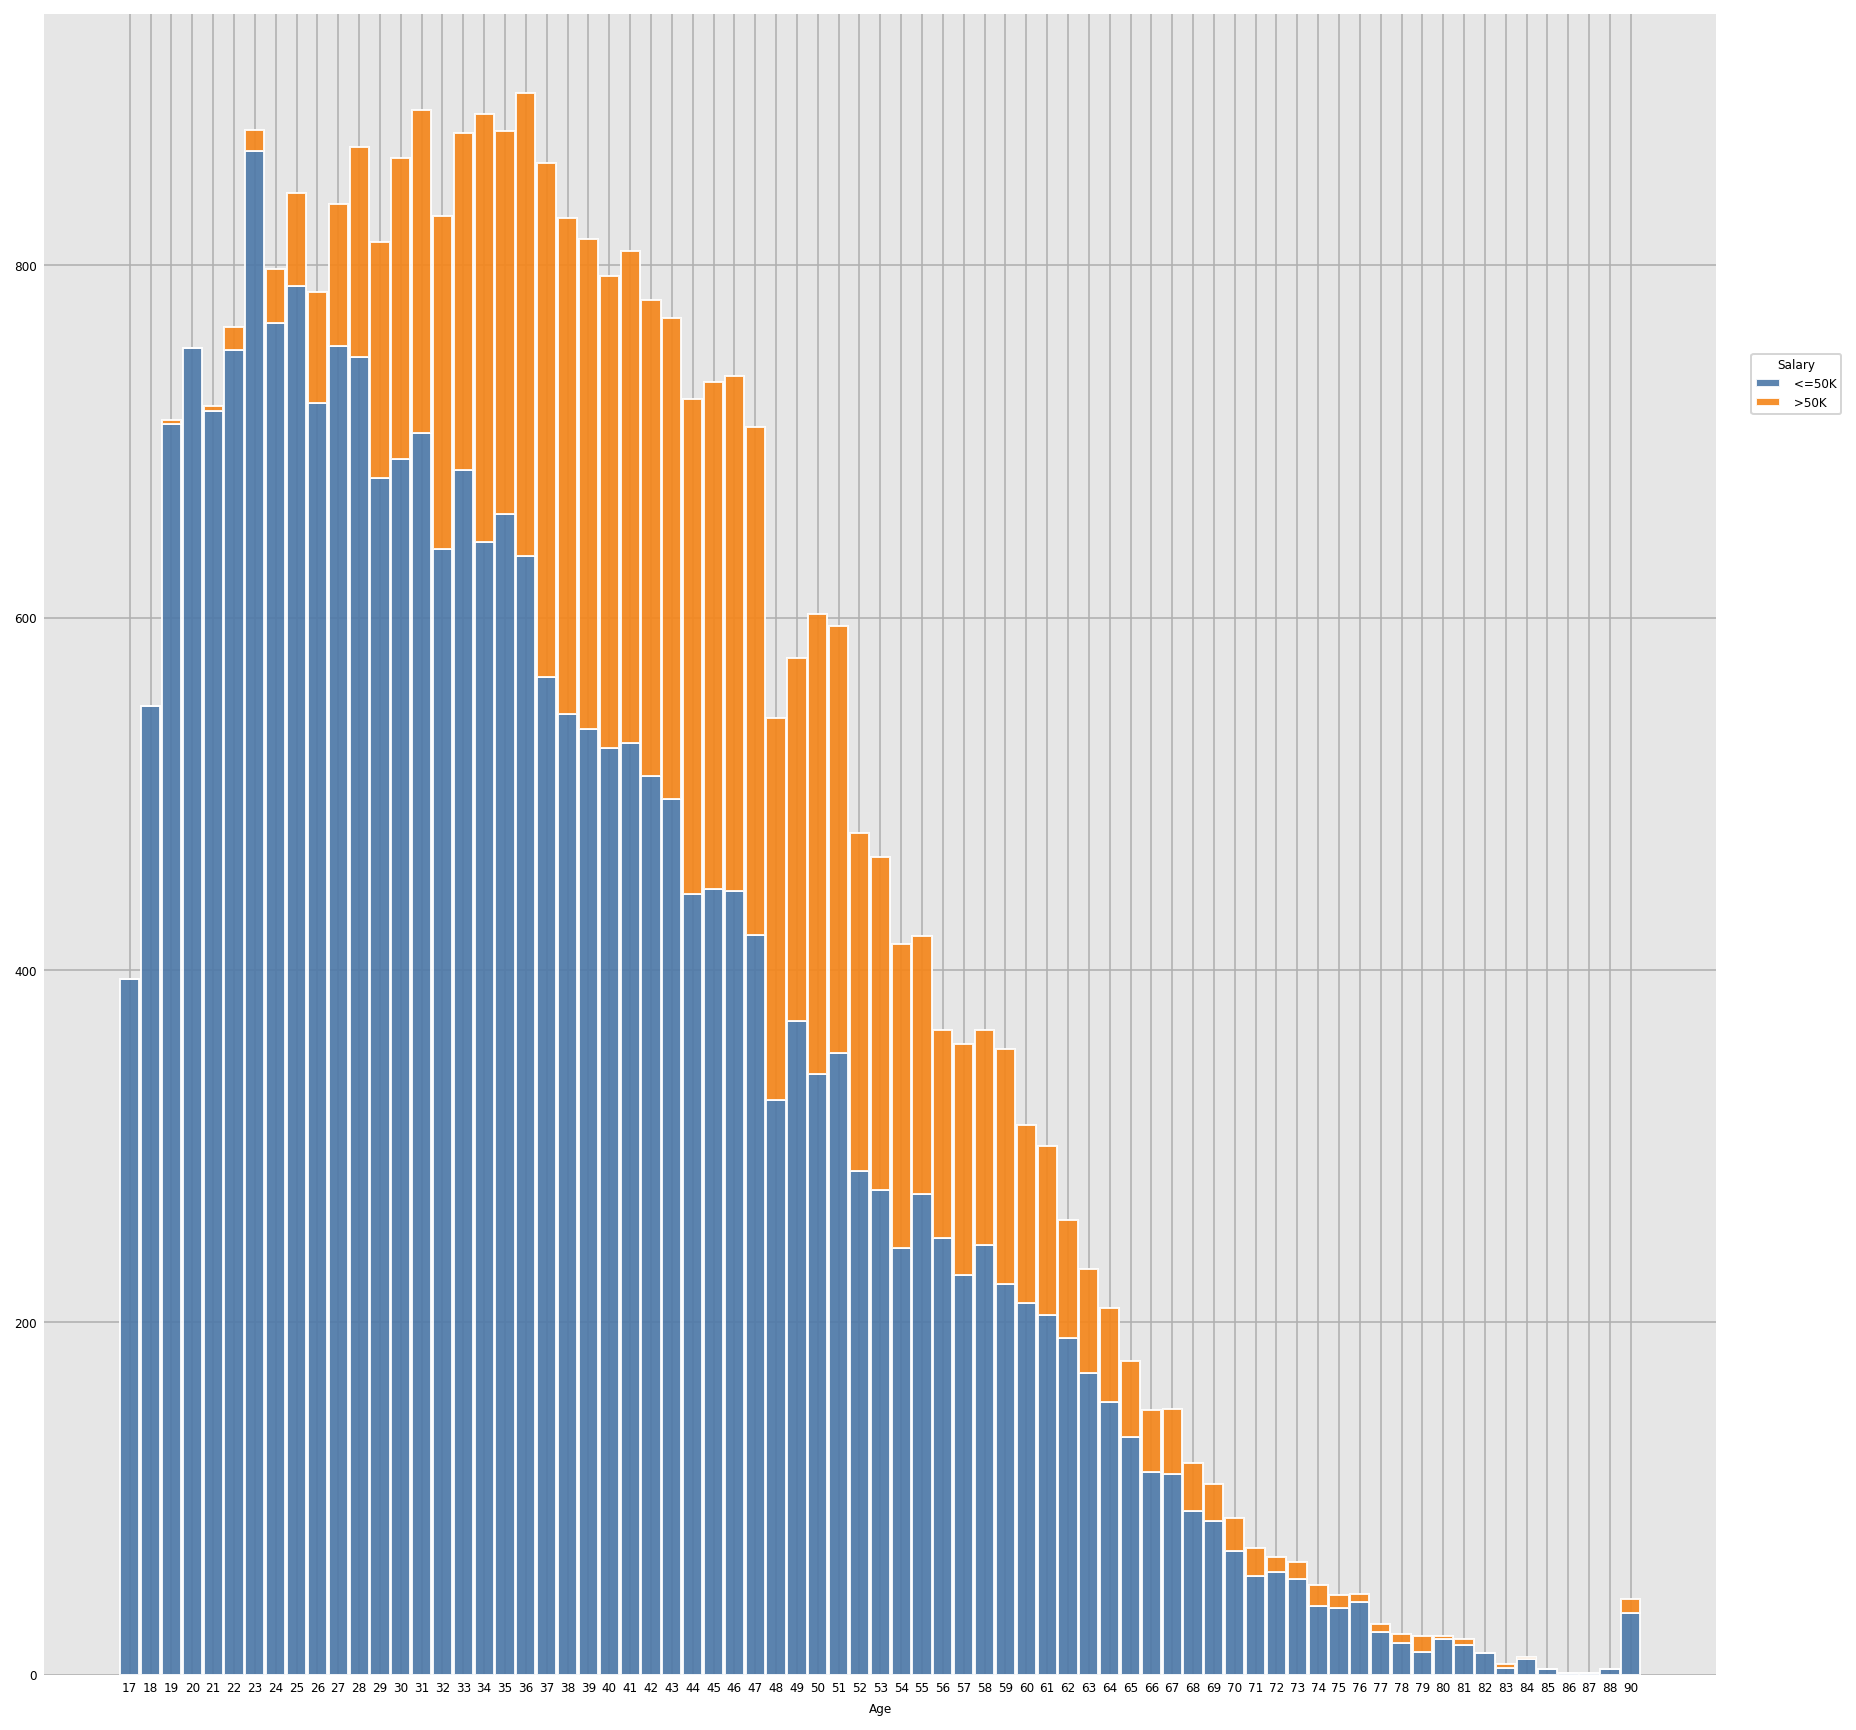

In [32]:
dxp.count(
    val="Age",
    data = df,
    split="Salary",
    stacked = True,
    figsize=(12,12),
    xlabel = "Age of the Working Class People")

Its obvious from the graph that with the passes of age tendency to get more salaries increases in general

### Splitting the Data into Train and Test Set

In [33]:
X = df.drop(['Age', 'id', 'Salary', 'Country', 'Family_Relation'], axis = 1)
y = df['Salary']

In [34]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (26048, 7)
The size of training output is (26048,)
The size of testing input is (6512, 7)
The size of testing output is (6512,)


# Feature Engineering

In [36]:
# Importing the category Encoders
! pip install category_encoders
import category_encoders as ce

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [37]:
X_train.head()

Type_of_Owner      Education  ...    Race   Gender
24639       Private           12th  ...   White     Male
5514      State-gov   Some-college  ...   White   Female
19777       Private   Some-college  ...   White   Female
10781       Private        HS-grad  ...   Black     Male
32239       Private      Assoc-voc  ...   White     Male

[5 rows x 7 columns]

In [38]:
encoder = ce.OrdinalEncoder(cols=['Education', 'Type_of_Owner', 'Gender', 'Job_Designation',
                                   'Marital_Status', 'No_of_Projects_Done', 'Race'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



In [39]:
# Now lets see how the Data looks like after doing the one-hot encoding

X_train.head()

Type_of_Owner  Education  ...  Race  Gender
24639              1          1  ...     1       1
5514               2          2  ...     1       2
19777              1          2  ...     1       2
10781              1          3  ...     2       1
32239              1          4  ...     1       1

[5 rows x 7 columns]

In [40]:
X_test.head()

Type_of_Owner  Education  ...  Race  Gender
14160              1          3  ...     1       2
27047              2          3  ...     1       2
28867              1          5  ...     2       1
5667               1         12  ...     1       1
7827               1          8  ...     1       2

[5 rows x 7 columns]

In [41]:
y_train.head()

24639     <=50K
5514      <=50K
19777     <=50K
10781     <=50K
32239     <=50K
Name: Salary, dtype: object

In [42]:
y_test.head()

14160     <=50K
27047     <=50K
28867      >50K
5667       >50K
7827      <=50K
Name: Salary, dtype: object

# Model Building

## Decision Tree Classifier

Decision Tree with Criterion Entropy

In [43]:
# Importing DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)

# Fitting/Training the Model
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [44]:
# Predicting Test set results using the Criterion Gini Index
y_pred = clf.predict(X_test)

In [45]:
# finding the training and testing accuracy
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ", clf.score(X_test, y_test))

Training Accuracy:  0.7867782555282555
Testing Accuracy:  0.7831695331695332


From the above output we can see that there is no variation in the train set and test accuracy

In [48]:
from sklearn.metrics import confusion_matrix

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4093  819]
 [ 593 1007]]


In [49]:
# Printing the scores on training and test set

print('Training set Score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set Score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set Score: 0.7868
Test set Score: 0.7832


## Logistic regression

In [52]:
# Standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
# Importing the required Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Defining model

model = LogisticRegression()

model.fit(X_train, y_train)

# Predicting the values for x-test
y_pred = model.predict(X_test)

In [54]:
# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))

Training Accuracy:  0.7495777027027027
Testing Accuracy:  0.7446253071253072


## Random Forest

In [55]:
# importing the Libraris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Creating a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predicting the value for X_test
y_pred = model.predict(X_test)

In [56]:
# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))

Training Accuracy:  0.855382371007371
Testing Accuracy:  0.8224815724815725


In [57]:
# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4473  439]
 [ 717  883]]


## KNeighborsClassifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier

# creating a model
model = KNeighborsClassifier(n_neighbors = 5)

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the values for x-test
y_pred = model.predict(X_test)

In [59]:
# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))

Training Accuracy:  0.8260902948402948
Testing Accuracy:  0.8046683046683046


In [60]:
# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4498  414]
 [ 858  742]]


In this model I build a Classifier model to predict the Salary of the Different Working Class People having different Age-Group, Gender, Race etc